In [18]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from model_pipeline import ModelPipeline, train_test_split, get_train_val_indices
import experiment

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
all_df = pd.read_csv('all_data.csv').set_index('date')
all_df

,nonfarm_payroll,payroll_delta_1m,payroll_delta_3m,payroll_delta_6m,payroll_delta_12m,payroll_diff_12m_1m,payroll_diff_12m_3m,payroll_diff_12m_6m,policy_rate,policy_rate_1m_ago,...,sp500,sp500_delta_1m,sp500_delta_3m,sp500_delta_6m,sp500_delta_12m,vol_30d,recession,recession_3m,recession_6m,recession_12m
date,,,,,,,,,,,,,,,,,,,,,
1939-01-01,29923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.300000,-6.392695,-6.605922,-0.243307,15.060811,1.846643,NaN,NaN,NaN,NaN
1939-02-01,30100.0,0.591518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.700000,3.252029,-0.235662,5.306794,11.992942,1.868115,NaN,NaN,NaN,NaN
1939-03-01,30280.0,0.598007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.980000,-13.543309,-16.438362,-10.294120,29.176465,1.755651,NaN,NaN,NaN,NaN
1939-04-01,30094.0,-0.614267,0.571467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.930000,-0.455366,-11.138210,-17.008350,11.758697,1.988600,NaN,NaN,NaN,NaN
1939-05-01,30299.0,0.681199,0.661130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.600000,6.129918,-8.661413,-8.876663,25.134842,1.223243,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,149744.0,0.337711,1.174960,2.293236,4.703637,4.365926,3.528676,2.410400,0.08,0.08,...,4515.549805,-5.258517,-1.950547,2.736813,21.573991,1.122077,1.0,1.0,0.0,0.0
2022-02-01,150458.0,0.476814,1.214918,2.419267,4.683184,4.206370,3.468266,2.263917,0.08,0.08,...,4373.939941,-3.136049,-4.227284,-3.288763,14.766935,1.390119,1.0,0.0,0.0,0.0
2022-03-01,150856.0,0.264526,1.082820,2.394657,4.448491,4.183965,3.365671,2.053834,0.20,0.08,...,4530.410156,3.577329,-4.946729,5.173953,14.033116,1.486786,1.0,0.0,0.0,0.0


# Run In Sample Experiments

### Logistic: including Ridge, Lasso & Elastic Net

In [3]:
# Define the model type & experiment directory where you want to save the experiment results
model_type = 'logistic'
data_dir = 'all_data.csv'
exp_dir = f'data_folder/experiments_in_sample_new'

In [4]:
# Features experiment for logistics model
experiment.features_experiment(model_type, data_dir, exp_dir)

Running Experiment 1:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 2:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 3:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 4:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 5:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 6:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_1

### SVC

In [5]:
model_type = 'svc'
experiment.features_experiment(model_type, data_dir, exp_dir)

Running Experiment 1:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 2:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 3:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 4:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 5:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 6:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_1

# Experiment Results

### Logistic

In [32]:
all_exp_list = range(1, 2305)
all_info_logistic, all_metrics_logistic = experiment.read_experiment_results('logistic', all_exp_list, exp_dir)

In [33]:
rank_logistic = all_metrics_logistic.sort_values(by='f1_macro', ascending=False)
rank_logistic

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num
0,0.692593,0.689702,0.613520,0.661224,0.692593,0.689934,0.691352,0.694286,0.631169,0.689702,0.689702,0.689702,1132.0
0,0.692593,0.689580,0.613653,0.660300,0.692593,0.689789,0.691246,0.695402,0.628571,0.689580,0.689580,0.689580,1852.0
0,0.691358,0.688770,0.612020,0.662162,0.691358,0.689036,0.690363,0.690141,0.636364,0.688770,0.688770,0.688770,1804.0
0,0.692118,0.688737,0.612225,0.657534,0.692118,0.688946,0.690571,0.695652,0.623377,0.688737,0.688737,0.688737,1708.0
0,0.691358,0.688526,0.612272,0.660326,0.691358,0.688760,0.690164,0.692308,0.631169,0.688526,0.688526,0.688526,1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.585185,0.583682,0.523673,0.559055,0.585185,0.583723,0.585002,0.563492,0.554688,0.583682,0.583682,0.583682,1110.0
0,0.585185,0.582912,0.523398,0.552000,0.585185,0.582897,0.584499,0.565574,0.539062,0.582912,0.582912,0.582912,1779.0
0,0.583951,0.581738,0.522567,0.551265,0.583951,0.581731,0.583311,0.564033,0.539062,0.581738,0.581738,0.581738,1734.0
0,0.581281,0.579136,0.520827,0.549072,0.581281,0.579134,0.580688,0.560976,0.537662,0.579136,0.579136,0.579136,1542.0


In [34]:
logistic_tops = list(rank_logistic['exp_num'].head(15))
logistic_tops

[1132.0,
 1852.0,
 1804.0,
 1708.0,
 1780.0,
 1900.0,
 1984.0,
 1792.0,
 940.0,
 1084.0,
 1936.0,
 2080.0,
 1816.0,
 1924.0,
 1768.0]

In [35]:
# Top logistic experiments:
for exp_num in logistic_tops:
    mask = all_info_logistic['exp_number'] == str(int(exp_num))
    feas = all_info_logistic.loc[mask, 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')
    y = all_info_logistic.loc[mask, 'y_variable'][0]
    print(f'For exp {exp_num}:')
    print(f'Y is {y} & Features are: {feas}')
    print(" ")
    sub_df = all_df[feas + [y]].copy().dropna().reset_index()

    fold_indices = get_train_val_indices(sub_df, lag=5, recession_period='3m')

For exp 1132.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_3m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1852.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_6m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1804.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1708.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_1m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1780.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1900.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_d

### SVC

In [36]:
all_info_svc, all_metrics_svc = experiment.read_experiment_results('svc', all_exp_list, exp_dir)

In [37]:
rank_svc = all_metrics_svc.sort_values(by='f1_macro', ascending=False)
rank_svc

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num
0,0.915737,0.913624,0.888712,0.907609,0.915737,0.915080,0.915423,0.951567,0.867532,0.913624,0.913624,0.913624,574.0
0,0.914498,0.912895,0.882512,0.907383,0.914498,0.913990,0.914293,0.938889,0.877922,0.912895,0.912895,0.912895,1342.0
0,0.914498,0.912781,0.883458,0.907133,0.914498,0.913957,0.914270,0.941341,0.875325,0.912781,0.912781,0.912781,526.0
0,0.913858,0.912011,0.886387,0.906122,0.913858,0.913269,0.913563,0.948718,0.867188,0.912011,0.912011,0.912011,1522.0
0,0.912609,0.911224,0.880212,0.905914,0.912609,0.912164,0.912422,0.936111,0.877604,0.911224,0.911224,0.911224,1534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.493842,0.492548,0.470483,0.466926,0.493842,0.492549,0.493874,0.466321,0.467532,0.492548,0.492548,0.492548,834.0
0,0.490706,0.489235,0.471833,0.461337,0.490706,0.489188,0.490465,0.465608,0.457143,0.489235,0.489235,0.489235,445.0
0,0.489467,0.488278,0.471378,0.463542,0.489467,0.488272,0.489406,0.464752,0.462338,0.488278,0.488278,0.488278,448.0
0,0.481527,0.479817,0.464530,0.449673,0.481527,0.479784,0.481342,0.452632,0.446753,0.479817,0.479817,0.479817,882.0


In [38]:
svc_tops = list(rank_svc['exp_num'].head(15))
svc_tops

[574.0,
 1342.0,
 526.0,
 1522.0,
 1534.0,
 2086.0,
 514.0,
 490.0,
 1510.0,
 2278.0,
 2230.0,
 694.0,
 682.0,
 1318.0,
 1258.0]

In [39]:
# Top SVC experiments:
for exp_num in svc_tops:
    mask = all_info_svc['exp_number'] == str(int(exp_num))
    feas = all_info_svc.loc[mask, 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')
    y = all_info_svc.loc[mask, 'y_variable'][0]
    print(f'For exp {exp_num}:')
    print(f'Y is {y} & Features are: {feas}')
    print(" ")
    sub_df = all_df[feas + [y]].copy().dropna().reset_index()

    fold_indices = get_train_val_indices(sub_df, lag=5, recession_period='3m')

For exp 574.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1342.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 526.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_6m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1522.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1534.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 2086.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'po

# Run Out sample performance
- We will run the out sample performance result for the top 15 features

In [41]:
# Logistic
out_sample_experiment_dir = Path('data_folder') / Path('experiments_out_sample_new')
experiment.out_sample_nested_experiments(model_type='logistic',
                                         exp_list=logistic_tops,
                                         insample_exp_dir=exp_dir,
                                         outsample_exp_dir=out_sample_experiment_dir)

For exp 1132:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_3m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1852:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_6m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1804:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1708:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_1m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1780:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1900:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'C

In [42]:
# SVC
experiment.out_sample_nested_experiments(model_type='svc',
                                         exp_list=svc_tops,
                                         insample_exp_dir=exp_dir,
                                         outsample_exp_dir=out_sample_experiment_dir)

For exp 574:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1342:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 526:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_6m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1522:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1534:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 2086:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_de

## Read Out Sample Results

In [44]:
all_info_log, all_metrics_log = experiment.read_out_sample_results('logistic',
                                                                   logistic_tops,
                                                                   out_sample_experiment_dir)

In [45]:
all_info_svc, all_metrics_svc = experiment.read_out_sample_results('svc',
                                                                   svc_tops,
                                                                   out_sample_experiment_dir)

### logistic

In [46]:
# For each experiment, data is split into 5 folds, show the average performance of 5 folds
all_metrics_log.groupby(['exp_num']).mean().sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,fold_num
exp_num,,,,,,,,,,,,,
1804.0,0.601235,0.612897,0.550678,0.533793,0.601235,0.585616,0.586360,0.637730,0.530126,0.612897,0.612897,0.612897,2.0
1936.0,0.605789,0.614406,0.551228,0.539908,0.605789,0.585457,0.587854,0.640021,0.556040,0.614406,0.614406,0.614406,2.0
1768.0,0.602469,0.612809,0.550278,0.535915,0.602469,0.585298,0.586453,0.631674,0.542804,0.612809,0.612809,0.612809,2.0
1924.0,0.602070,0.610792,0.548541,0.536509,0.602070,0.581062,0.583362,0.635344,0.555893,0.610792,0.610792,0.610792,2.0
1792.0,0.597531,0.610183,0.548354,0.526270,0.597531,0.579081,0.579293,0.639169,0.531159,0.610183,0.610183,0.610183,2.0
1708.0,0.599523,0.612082,0.555319,0.518243,0.599523,0.579037,0.579019,0.654932,0.507609,0.612082,0.612082,0.612082,2.0
1816.0,0.596296,0.607548,0.545617,0.522882,0.596296,0.577553,0.578394,0.628804,0.527283,0.607548,0.607548,0.607548,2.0
1852.0,0.595062,0.608374,0.548850,0.519897,0.595062,0.576924,0.576759,0.635260,0.515628,0.608374,0.608374,0.608374,2.0
1780.0,0.593827,0.605971,0.544138,0.521667,0.593827,0.575112,0.575573,0.626778,0.528577,0.605971,0.605971,0.605971,2.0


### SVC

In [48]:
# For each experiment, data is split into 5 folds, show the average performance of 5 folds
all_metrics_svc.groupby(['exp_num']).mean().sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,fold_num
exp_num,,,,,,,,,,,,,
1318.0,0.623181,0.619251,0.552483,0.545030,0.623181,0.597188,0.604663,0.619948,0.551640,0.619251,0.619251,0.619251,2.0
1522.0,0.609231,0.603702,0.545681,0.543076,0.609231,0.592531,0.601118,0.611646,0.512078,0.603702,0.603702,0.603702,2.0
1258.0,0.614439,0.608127,0.548355,0.510957,0.614439,0.588497,0.597161,0.620225,0.475666,0.608127,0.608127,0.608127,2.0
2230.0,0.597958,0.599422,0.541291,0.528740,0.597958,0.582418,0.588738,0.605179,0.506590,0.599422,0.599422,0.599422,2.0
2086.0,0.609562,0.607203,0.543828,0.531247,0.609562,0.581925,0.588938,0.603190,0.543499,0.607203,0.607203,0.607203,2.0
1342.0,0.610835,0.604262,0.543541,0.531876,0.610835,0.578138,0.586750,0.619784,0.532318,0.604262,0.604262,0.604262,2.0
2278.0,0.596739,0.594476,0.538359,0.520834,0.596739,0.574668,0.582512,0.611242,0.507626,0.594476,0.594476,0.594476,2.0
574.0,0.600866,0.593881,0.540238,0.501958,0.600866,0.567351,0.575883,0.595706,0.492074,0.593881,0.593881,0.593881,2.0
1534.0,0.584161,0.579473,0.538510,0.510191,0.584161,0.561659,0.570120,0.597453,0.481445,0.579473,0.579473,0.579473,2.0


Best Features -- select two experiments for each type of model
- Logistic: 1804, 1936
- SVC: 1318, 1522

Get the best fold

In [50]:
# exp 1804, best fold is 4
all_metrics_log.loc[all_metrics_log['exp_num']==1804.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.691358,0.691826,0.655265,0.698795,0.691358,0.691170,0.691546,0.716049,0.682353,0.691826,0.691826,0.691826,1804.0,4.0
0,0.635802,0.635428,0.597257,0.646707,0.635802,0.635455,0.635733,0.642857,0.650602,0.635428,0.635428,0.635428,1804.0,3.0
0,0.604938,0.609146,0.597387,0.407407,0.604938,0.555556,0.553727,0.846154,0.268293,0.609146,0.609146,0.609146,1804.0,2.0
0,0.524691,0.578704,0.374086,0.509554,0.524691,0.524238,0.529133,0.388350,0.740741,0.578704,0.578704,0.578704,1804.0,1.0
0,0.549383,0.549383,0.529394,0.406504,0.549383,0.521660,0.521660,0.595238,0.308642,0.549383,0.549383,0.549383,1804.0,0.0


In [51]:
# exp 1936.0, best fold is 3
all_metrics_log.loc[all_metrics_log['exp_num']==1936.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.679012,0.674725,0.642482,0.711111,0.679012,0.675000,0.677229,0.680851,0.744186,0.674725,0.674725,0.674725,1936.0,3.0
0,0.660494,0.655691,0.621346,0.699454,0.660494,0.654691,0.656902,0.653061,0.752941,0.655691,0.655691,0.655691,1936.0,4.0
0,0.565217,0.563735,0.536594,0.426230,0.565217,0.538115,0.538810,0.619048,0.325000,0.563735,0.563735,0.563735,1936.0,0.0
0,0.534161,0.585517,0.373938,0.509804,0.534161,0.533008,0.540935,0.390000,0.735849,0.585517,0.585517,0.585517,1936.0,1.0
0,0.590062,0.592361,0.581781,0.352941,0.590062,0.526471,0.525393,0.857143,0.222222,0.592361,0.592361,0.592361,1936.0,2.0


In [52]:
# exp 1318, best fold is 3
all_metrics_svc.loc[all_metrics_svc['exp_num']==1318.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.685185,0.672124,0.635769,0.748768,0.685185,0.663640,0.668895,0.649573,0.883721,0.672124,0.672124,0.672124,1318.0,3.0
0,0.654321,0.655309,0.625610,0.658537,0.654321,0.654268,0.654479,0.683544,0.635294,0.655309,0.655309,0.655309,1318.0,4.0
0,0.639752,0.639043,0.591670,0.591549,0.639752,0.634664,0.634931,0.677419,0.525000,0.639043,0.639043,0.639043,1318.0,0.0
0,0.602484,0.593204,0.382028,0.483871,0.602484,0.580319,0.613268,0.422535,0.566038,0.593204,0.593204,0.593204,1318.0,1.0
0,0.534161,0.536574,0.527337,0.242424,0.534161,0.453051,0.451742,0.666667,0.148148,0.536574,0.536574,0.536574,1318.0,2.0


In [54]:
# exp 1522, best fold is 0
all_metrics_svc.loc[all_metrics_svc['exp_num']==1522.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.643750,0.642210,0.592141,0.589928,0.643750,0.637505,0.638100,0.683333,0.518987,0.642210,0.642210,0.642210,1522.0,0.0
0,0.662500,0.640313,0.416656,0.526316,0.662500,0.632090,0.669111,0.483871,0.576923,0.640313,0.640313,0.640313,1522.0,1.0
0,0.614907,0.615801,0.592743,0.617284,0.614907,0.614892,0.614996,0.641026,0.595238,0.615801,0.615801,0.615801,1522.0,4.0
0,0.568750,0.563934,0.591069,0.610169,0.568750,0.563826,0.569040,0.613636,0.606742,0.563934,0.563934,0.563934,1522.0,3.0
0,0.556250,0.556250,0.535795,0.371681,0.556250,0.514343,0.514343,0.636364,0.262500,0.556250,0.556250,0.556250,1522.0,2.0


Logistic model:
- For exp #1804, the best fold out-sample performance is fold 4; all 5 fold f1macro scores range from 52% - 69%
- For exp #1936, the best fold out-sample performance is fold 3; all 5 fold f1macro scores range from 53% - 68%
- The average f1-macro for all 5 fold of experiment #1804 is higher than experiment #1936, but #1936 has a slightly higher variance in the out-sample performance.
- For logistic model, it's hard to tell which model is better, we will plot the predicted probability to compare the model performance

SVC model:
- For exp #1318, the best fold out-sample performance is fold 3; all 5 fold f1macro scores range from 45% - 66%
- For exp #1522, the best fold out-sample performance is fold 0; all 5 fold f1macro scores range from 51% - 64%
- Although the average f1-macro for all 5 fold of experiment #1318 is higher than experiment #1522, the generalization of experiment 1318 is worse than 1522, since one fold in #1318 f1macro score is <50%, this experiment (set of features) does not do well in generalization
- For SVC model, the features in experiment #1522 is better, and fold 0 model has the best performance.


## Read Model & Fit all data

In [57]:
clf_dict = {}
for exp_num in [1804, 1936, 1318, 1522]:

    if exp_num == 1804:
        fold_num = 4
        model_type = 'logistic'
        feas = all_info_log.loc[all_info_log['exp_number']=='1804', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    elif exp_num == 1936:
        fold_num = 3
        model_type = 'logistic'
        feas = all_info_log.loc[all_info_log['exp_number']=='1936', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    elif exp_num == 1318:
        fold_num = 3
        model_type = 'svc'
        feas = all_info_svc.loc[all_info_svc['exp_number']=='1318', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    elif exp_num == 1522:
        fold_num = 0
        model_type = 'svc'
        feas = all_info_svc.loc[all_info_svc['exp_number']=='1522', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    fold_path = f'data_folder/experiments_out_sample_new/{model_type}/exp_{exp_num}/fold_{fold_num}'
    filename = f'{fold_path}/model.pkl'

    with open(filename, 'rb') as f:
        clf = pickle.load(f)
        clf_dict[exp_num] = {'model': clf,
                             'features': feas}


In [58]:
clf_dict

{1804: {'model': <model_pipeline.ModelPipeline at 0x268664a2220>,
  'features': ['payroll_diff_12m_6m',
   'policy_rate_delta_3m',
   'CPI_delta_3m',
   'yield_10y_delta6m',
   'yield_spread',
   'sp500_delta_3m',
   'vol_30d']},
 1936: {'model': <model_pipeline.ModelPipeline at 0x268649d56a0>,
  'features': ['payroll_diff_12m_6m',
   'policy_rate_delta_6m',
   'CPI_delta_1m',
   'yield_10y_delta3m',
   'yield_spread',
   'sp500_delta_3m',
   'vol_30d']},
 1318: {'model': <model_pipeline.ModelPipeline at 0x26865f78190>,
  'features': ['payroll_diff_12m_3m',
   'policy_rate_delta_6m',
   'CPI_delta_12m',
   'yield_10y_delta3m',
   'yield_spread',
   'sp500_delta_12m',
   'vol_30d']},
 1522: {'model': <model_pipeline.ModelPipeline at 0x26865f786a0>,
  'features': ['payroll_diff_12m_3m',
   'policy_rate_delta_12m',
   'CPI_delta_12m',
   'yield_10y_delta6m',
   'yield_spread',
   'sp500_delta_12m',
   'vol_30d']}}

In [59]:
def get_prediction(clf_dict, exp_num):
    model = clf_dict[exp_num]['model']
    features = clf_dict[exp_num]['features']
    sub_df = all_df[features + ['recession', 'recession_3m']].copy().dropna()

    y_data = model.get_prediction(sub_df[features], sub_df[['recession', 'recession_3m']]).reset_index()
    y_data['date'] = pd.to_datetime(y_data['date'])
    return features, sub_df, y_data, model

### Predict using Models

Model Logistic - 1804 & 1936

In [60]:
features, sub_df, y_data, model = get_prediction(clf_dict, 1804)
features2, sub_df2, y_data2, model2 = get_prediction(clf_dict, 1936)

C:\Users\zhuk3\PythonProjects\recession_prediction\model_pipeline.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data['y_pred'] = y_pred
C:\Users\zhuk3\PythonProjects\recession_prediction\model_pipeline.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data[['prob_0', 'prob_1']] = prob
C:\Users\zhuk3\PythonProjects\recession_prediction\model_pipeline.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Model SVC - 1318 & 1522

In [61]:
features3, sub_df3, y_data3, model3 = get_prediction(clf_dict, 1318)
features4, sub_df4, y_data4, model4 = get_prediction(clf_dict, 1522)

C:\Users\zhuk3\PythonProjects\recession_prediction\model_pipeline.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data['y_pred'] = y_pred
C:\Users\zhuk3\PythonProjects\recession_prediction\model_pipeline.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data[['prob_0', 'prob_1']] = prob
C:\Users\zhuk3\PythonProjects\recession_prediction\model_pipeline.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

# Plot the predicted probability of each model

### Compare two Logistic model

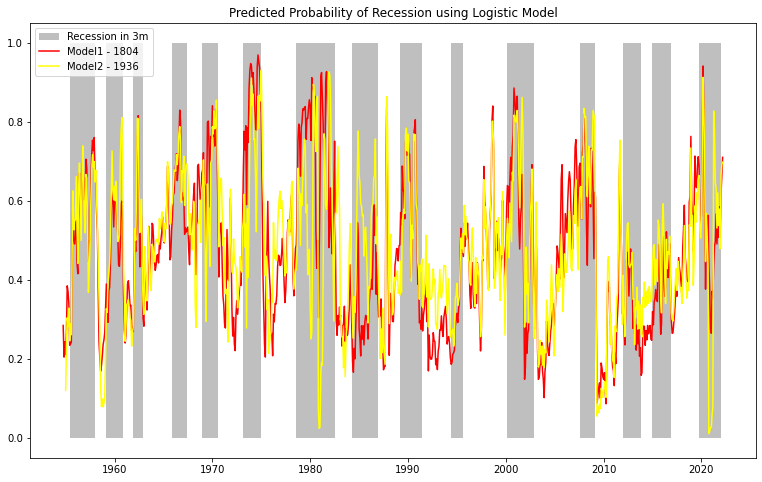

In [62]:
plt.figure(figsize=(13, 8))
plt.fill_between(y_data['date'], 0, 1, where=y_data['recession_3m']==1, facecolor='grey', alpha=0.5, label='Recession in 3m')

plt.plot(y_data['date'], y_data['prob_1'], color='red', label='Model1 - 1804')
plt.plot(y_data2['date'], y_data2['prob_1'], color='yellow', label='Model2 - 1936')

plt.title("Predicted Probability of Recession using Logistic Model")
plt.legend()
plt.show()

From the comparison plot, we can see that compares to model2, model1 gives a higher probability to recession and gives a lower probability when there is no recession in general. So Model 1 is better than Model 2.

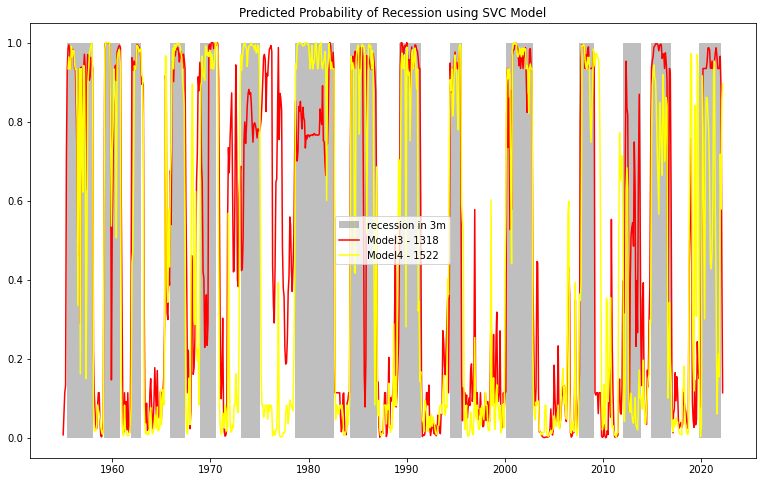

In [63]:
# Compare the predicted probability of Logistic & SVC
plt.figure(figsize=(13, 8))
plt.fill_between(y_data['date'], 0, 1, where=y_data['recession_3m']==1, facecolor='grey', alpha=0.5, label='recession in 3m')
plt.plot(y_data3['date'], y_data3['prob_1'], color='red', label='Model3 - 1318')
plt.plot(y_data4['date'], y_data4['prob_1'], color='yellow', label='Model4 - 1522')
plt.title("Predicted Probability of Recession using SVC Model")

plt.legend()
plt.show()

From the comparison plot, we can see that compares to model3, model4 gives a higher probability to recession and gives a lower probability when there is no recession in general. So Model 4 is better than Model 3. This is consistent conclusion with our earlier metrics performance analysis.

## Compare Model 1 & Model 4

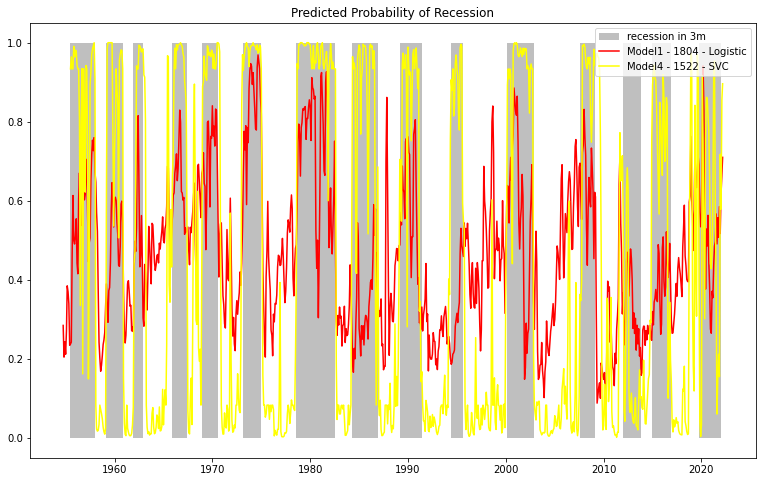

In [64]:
# Compare the predicted probability of Logistic & SVC
plt.figure(figsize=(13, 8))
plt.fill_between(y_data['date'], 0, 1, where=y_data['recession_3m']==1, facecolor='grey', alpha=0.5, label='recession in 3m')
plt.plot(y_data['date'], y_data['prob_1'], color='red', label='Model1 - 1804 - Logistic')
plt.plot(y_data4['date'], y_data4['prob_1'], color='yellow', label='Model4 - 1522 - SVC')
plt.title("Predicted Probability of Recession")

plt.legend()
plt.show()

- From this plot we see that the SVC model does a better job in predicting recession probability

### Show the best model features

In [65]:
clf_dict[1522.0]['features']

['payroll_diff_12m_3m',
 'policy_rate_delta_12m',
 'CPI_delta_12m',
 'yield_10y_delta6m',
 'yield_spread',
 'sp500_delta_12m',
 'vol_30d']

### Show the best model parameters

In [66]:
best_model = clf_dict[1522.0]['model'].pipeline
best_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(C=4.3, degree=1, probability=True))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(C=4.3, degree=1, probability=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 4.3,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 1,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': True,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}